In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
obl_data_raw = pd.read_csv("obliquity.csv", skiprows = [1,2])
obl_data = obl_data_raw.loc[obl_data_raw['Pflag'] == 'y']

In [103]:
ipac_data_raw = pd.read_csv("PS_2025.03.05_11.27.17.csv", skiprows = 100)
ipac_data = ipac_data_raw.loc[(ipac_data_raw['discoverymethod'] == 'Transit')]

In [105]:
def normalize_name(name: str) -> str:
    return (name.strip()       
            .lower()             
            .replace('_', '') 
            .replace('-', '') 
            .replace(' ', ''))

obl_data['merge_key'] = obl_data['System'].apply(normalize_name)
ipac_data['merge_key'] = ipac_data['pl_name'].apply(normalize_name)
obl_data['merge_key2'] = obl_data['System'].apply(normalize_name)
ipac_data['merge_key2'] = ipac_data['hostname'].apply(normalize_name)

merged_df1 = pd.merge(obl_data, ipac_data, on='merge_key', how='inner')
merged_df2 = pd.merge(obl_data, ipac_data, on='merge_key2', how='inner')
final_merged_df = pd.concat([merged_df1, merged_df2], axis=0, ignore_index=True)
#check for failures
unmatched_rows = obl_data[~obl_data['System'].isin(final_merged_df['System'])]


/var/folders/zy/svq90h_50mxf99qdbwj36m3m0000gn/T/ipykernel_78366/2348131395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obl_data['merge_key'] = obl_data['System'].apply(normalize_name)
/var/folders/zy/svq90h_50mxf99qdbwj36m3m0000gn/T/ipykernel_78366/2348131395.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipac_data['merge_key'] = ipac_data['pl_name'].apply(normalize_name)
/var/folders/zy/svq90h_50mxf99qdbwj36m3m0000gn/T/ipykernel_78366/2348131395.py:10: SettingWithCopyWarning: 
A value is tryi

In [106]:
final_merged_df.columns

Index(['System', 'Teff', 'errup', 'errdn', 'Pflag', 'lambda', 'errup.1',
       'errdn.1', 'psi', 'errup.2',
       ...
       'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2', 'rowupdate',
       'pl_pubdate', 'releasedate', 'merge_key2_y', 'merge_key_x',
       'merge_key2', 'merge_key_y'],
      dtype='object', length=111)

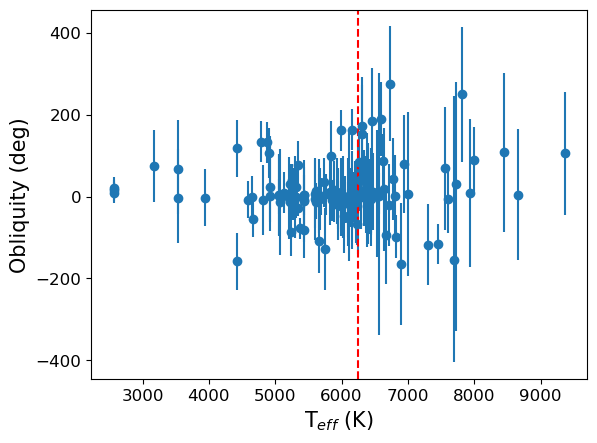

In [115]:
#exclusions
idx = (final_merged_df['lambda'] != -999) 

#plot it
plt.errorbar(final_merged_df.loc[idx]['Teff'], final_merged_df.loc[idx]['lambda'], 
             yerr = [final_merged_df.loc[idx]['errdn'], final_merged_df.loc[idx]['errup']], linestyle='None', marker = 'o')
plt.ylabel("Obliquity (deg)", fontsize = 15)
plt.xlabel("T$_{eff}$ (K)", fontsize = 15)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.axvline(6250, c='r', linestyle="--")  


## Choose your own x axis

In [ ]:
#exclusions
idx = (final_merged_df['lambda'] != -999) 

#plot it
plt.errorbar(final_merged_df.loc[idx]['Teff'], final_merged_df.loc[idx]['lambda'], 
             yerr = [final_merged_df.loc[idx]['errdn'], final_merged_df.loc[idx]['errup']], linestyle='None', marker = 'o')
plt.ylabel("Obliquity (deg)", fontsize = 15)
plt.xlabel("T$_{eff}$ (K)", fontsize = 15)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)